# Ecommerce Churn Prediction | Data Mining

> ### Objective of Project:
> Building a Churn Prediction Model for Ecommerce Company: A Comparative Study of Classification Algorithms and Deep Learning Architectures

### Libraries and imports

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [99]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Exploring Dataset of Telecommunication Customers for Pattern finding

In [17]:
Dataset_description_sheet = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="Data Dict",usecols=[2,3],header=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Dataset_description_sheet

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [27]:
#Dataset
Ecommerce_data = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")
Ecommerce_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [19]:
Ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [22]:
Ecommerce_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


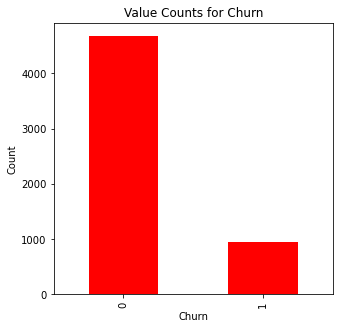

0    4682
1     948
Name: Churn, dtype: int64


In [23]:
#Value Counts for categorical columns

value_counts_col = Ecommerce_data['Churn'].value_counts()

plt.figure(figsize=(5, 5))
value_counts_col.plot(kind='bar', color='red')
plt.title(f"Value Counts for Churn")
plt.xlabel('Churn')
plt.ylabel("Count")

plt.show()
print(value_counts_col)

In [24]:
for col in Ecommerce_data.columns:
    if Ecommerce_data[col].dtype != 'int64' and Ecommerce_data[col].dtype != 'float64':
        print(f'{col} : {Ecommerce_data[col].unique()}')

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender : ['Female' 'Male']
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus : ['Single' 'Divorced' 'Married']


### Missing values

In [28]:
print("Before Dropping Missing values:", Ecommerce_data.isna().sum())
Ecommerce_data.dropna(inplace=True)
print("After Dropping missing values: ",Ecommerce_data.isna().sum().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
0


In [33]:
#Label Encoding
Encoded_data = Ecommerce_data.copy()
Encoded_data.drop(['CustomerID','OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn'],axis=1,inplace=True)

label_Encoder = LabelEncoder()
Encoded_data = Encoded_data.apply(lambda x: label_Encoder.fit_transform(x))
Encoded_data[['OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn']] = Ecommerce_data[['OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn']]
Encoded_data.head()

# telcom total charge replace('','0').astype(float)

# Encoded_data.TotalCharges = Encoded_data.TotalCharges.replace(' ','0')
# Encoded_data.TotalCharges = Encoded_data.TotalCharges.astype(float)




,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,Churn
0,4,1,2,1,4,0,3,2,2,1,2,8,1,1,0,11.0,5.0,159.93,1
3,0,2,2,10,4,1,2,3,2,4,2,7,0,0,0,23.0,3.0,134.07,1
5,0,0,0,17,4,0,3,4,4,4,2,1,1,4,5,22.0,7.0,139.19,1
11,11,1,0,1,4,1,3,3,0,2,2,9,1,0,0,13.0,0.0,153.81,1
12,0,2,0,6,1,1,2,2,3,2,2,1,1,2,1,13.0,2.0,134.41,1


In [149]:
#encoding object columns
# object_columns = telecom.select_dtypes(include=["object"])
# encoded_object_columns = pd.get_dummies(object_columns)
# encoded_data = pd.concat([telecom.drop(columns=object_columns), encoded_object_columns], axis=1)

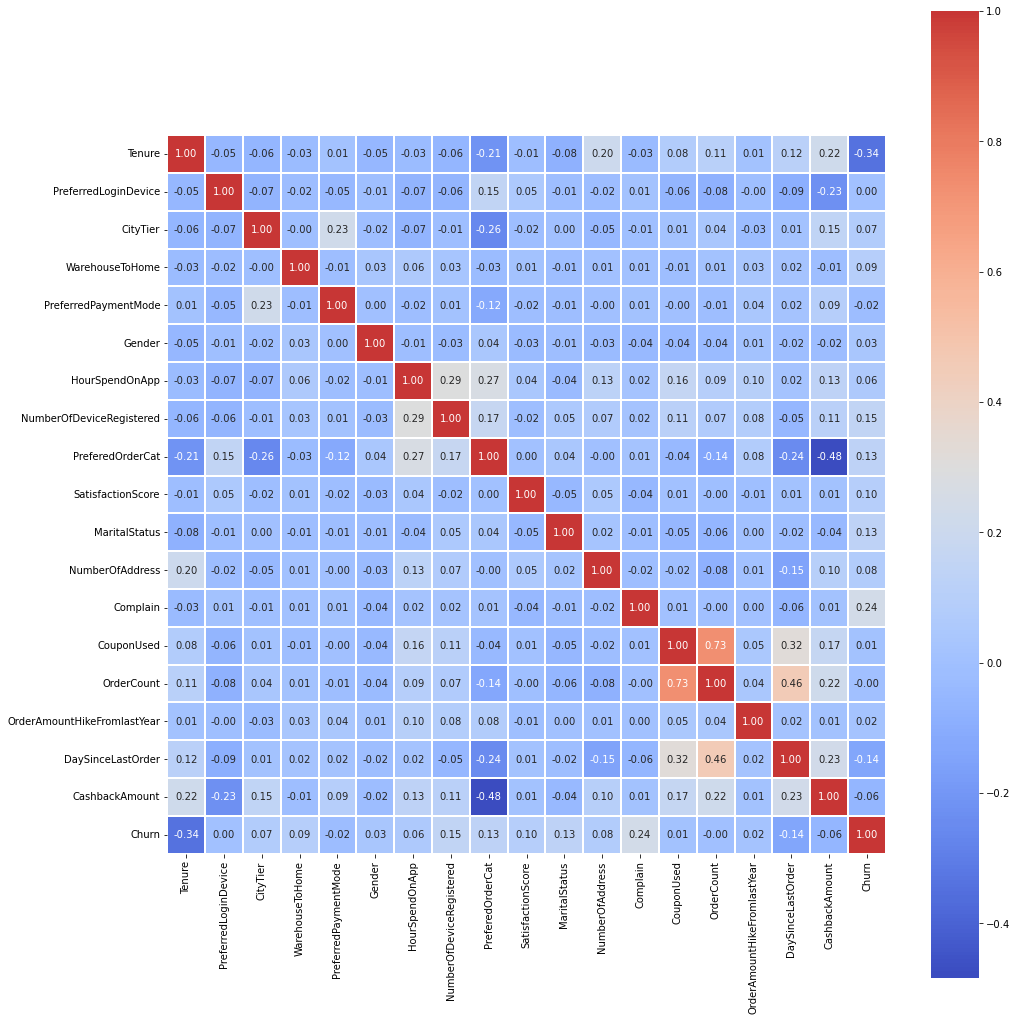

<Figure size 432x288 with 0 Axes>

In [34]:
#Correlation Matrix

corr_mat = Encoded_data.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, annot=True , fmt = '.2f',linewidths=0.25, center= 0.3, cmap= 'coolwarm', square=True)
plt.tight_layout()
plt.show()
plt.clf()

In [35]:
Encoded_data.describe()


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,Churn
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000
mean,8.767356,0.898251,0.707737,10.696608,3.668786,0.601749,2.981187,2.754107,2.459724,2.056439,1.184950,3.210122,0.282194,1.719131,1.825384,15.72761,4.526232,164.213590,0.167197
std,7.637732,0.690500,0.936725,8.222451,1.234926,0.489603,0.722158,1.025233,1.278725,1.389730,0.663881,2.530198,0.450127,1.670298,2.467597,3.62991,3.371310,24.093966,0.373201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,4.000000,3.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,13.00000,2.000000,148.485000,0.000000
50%,8.000000,1.000000,0.000000,9.000000,4.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,15.00000,3.000000,160.050000,0.000000
75%,13.000000,1.000000,2.000000,16.000000,4.000000,1.000000,3.000000,3.000000,4.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,18.00000,7.000000,178.010000,0.000000
max,33.000000,2.000000,2.000000,33.000000,6.000000,1.000000,5.000000,5.000000,5.000000,4.000000,2.000000,13.000000,1.000000,14.000000,15.000000,26.00000,46.000000,324.990000,1.000000


In [152]:


def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
# int_columns = ["tenure","MonthlyCharges","TotalCharges"]

# for col in int_columns:
#     removed_outliers = removal_box_plot(telecom, col, 50)

In [153]:
# telco_numerical = telecom.select_dtypes(include=[int, float])
# f, ax = plt.subplots(1, 3, figsize=(12, 4))
# ax = ax.flatten()
# for i, col in enumerate(telco_numerical.columns):
#     sns.boxplot(data=telco_numerical, x=col, y=np.array([""]* len(telco_numerical)), ax=ax[i])

# plt.tight_layout()
# plt.show()
# plt.clf()

> # data vis left for now

### Class Imbalancing

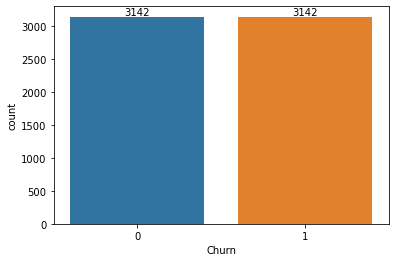

<Figure size 432x288 with 0 Axes>

In [36]:

y = Encoded_data['Churn']
X = Encoded_data.drop('Churn', axis=1)
# Resampling
resample = SMOTETomek(random_state=42)
X_res, y_res = resample.fit_resample(X, y)

ax = sns.countplot(x=y_res)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=Encoded_data['Churn'],
                                                    random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2641, 18), (1133, 18), (2641,), (1133,))

In [38]:
X_train

array([[0.18181818, 0.        , 1.        , ..., 0.53333333, 0.06521739,
        0.52201606],
       [0.63636364, 1.        , 0.        , ..., 0.13333333, 0.02173913,
        0.44939844],
       [0.66666667, 0.5       , 1.        , ..., 0.26666667, 0.17391304,
        0.58275639],
       ...,
       [0.12121212, 0.5       , 0.        , ..., 0.73333333, 0.06521739,
        0.50256931],
       [0.3030303 , 0.5       , 0.        , ..., 0.13333333, 0.17391304,
        0.52263147],
       [0.03030303, 0.5       , 0.        , ..., 0.06666667, 0.08695652,
        0.47570694]])

Pair Plots¶
This allows us to view the distributions and relationships between numerical variables. From the histograms on the diagonal, there are a few observations that can be made:

Tenure - Non-Churned

Two peaks: Very low tenure and very high. We could investigate which demographics belong to these peaks (if any). I would predict that senior citizens are less likely to change service providers. We could also compare the types of packages to tenure length and see if there's any correlation.
Tenure - Churned

One Peak: Very clear trend that the shorter the tenure, the stronger the correlation to churning.
Monthly Charges - All Samples

Three modes: $35, \$50, $80. Likely similar to the default package prices available to customers with the most popular being the cheapest plan.
Total Charges - All Samples

Vast majority of customers have relatively low total charges. This makes sense as the total charge column is dependent on tenure and monthly charge.
There is a clear linear relationship between all variables with the exception of tenure vs MonthlyCharges.

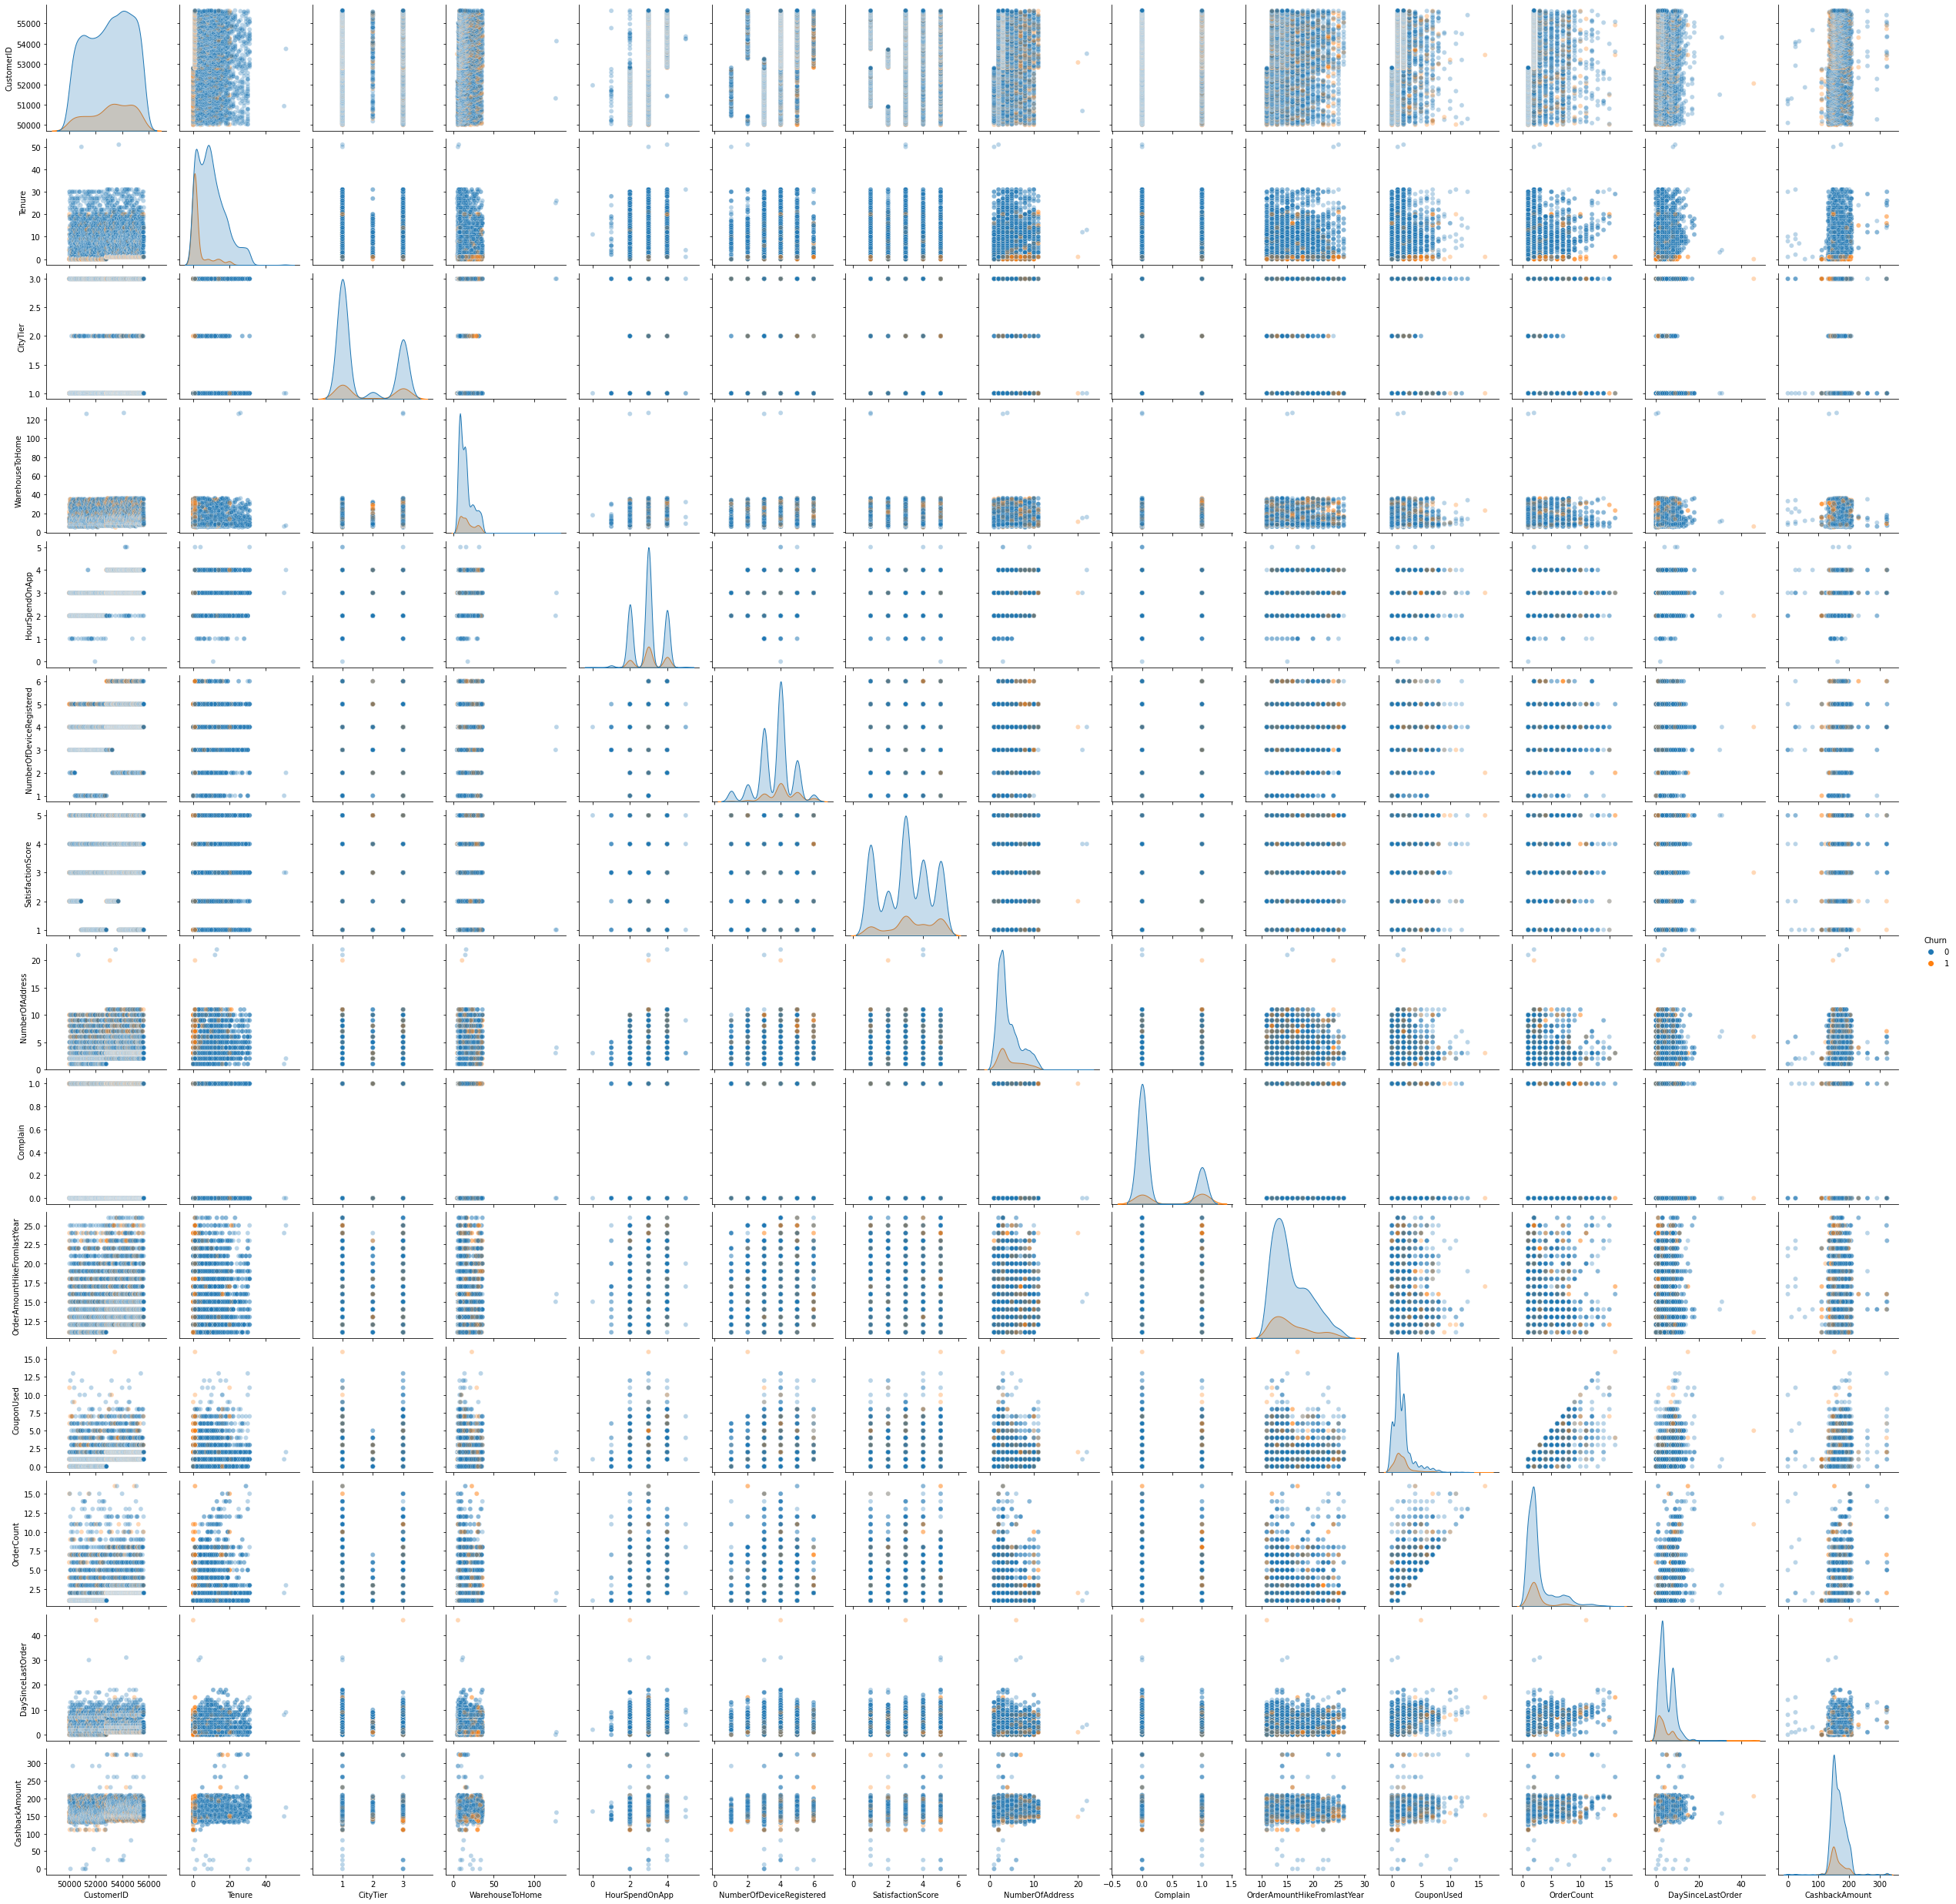

<Figure size 432x288 with 0 Axes>

In [39]:

numerics = Ecommerce_data.select_dtypes(include=[int, float])
numerics["Churn"] = Ecommerce_data["Churn"]

sns.pairplot(data=numerics, hue="Churn", plot_kws={'alpha': 0.3})
plt.show()
plt.clf()

We can more clearly see some of the relationships if we reduce the variation in possible monthly charges. We can see that for service plans cheaper than 35 dollars, the tenure and TotalCharges distributions have kept their shape but the MonthlyCharges values have fallen into more discrete modes with plans varying by roughly 5 dollars.

In [40]:
telco_less_than_35 = numerics[numerics["MonthlyCharges"] < 35]

sns.pairplot(data=telco_less_than_35, hue="Churn")
plt.show()
plt.clf()

KeyError: 'MonthlyCharges'

In [41]:
numeric = pd.DataFrame(data=Encoded_data,columns=["OrderAmountHikeFromlastYear","CashbackAmount","Churn"])
print("Summary Statistics of Non-Churned Customers")
print(numeric[numeric["Churn"] == False].describe())

print("\nSummary Statistics of Churned Customers")
print(numeric[numeric["Churn"] == True].describe())

Summary Statistics of Non-Churned Customers
       OrderAmountHikeFromlastYear  CashbackAmount   Churn
count                  3143.000000     3143.000000  3143.0
mean                     15.699650      164.847821     0.0
std                       3.588939       24.002068     0.0
min                      11.000000        0.000000     0.0
25%                      13.000000      149.000000     0.0
50%                      15.000000      161.880000     0.0
75%                      18.000000      178.655000     0.0
max                      26.000000      324.990000     0.0

Summary Statistics of Churned Customers
       OrderAmountHikeFromlastYear  CashbackAmount  Churn
count                   631.000000      631.000000  631.0
mean                     15.866878      161.054501    1.0
std                       3.827390       24.320397    0.0
min                      11.000000      110.090000    1.0
25%                      13.000000      147.070000    1.0
50%                      15.000000  

In [42]:
Encoded_data.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,Churn
0,4,1,2,1,4,0,3,2,2,1,2,8,1,1,0,11.0,5.0,159.93,1
3,0,2,2,10,4,1,2,3,2,4,2,7,0,0,0,23.0,3.0,134.07,1
5,0,0,0,17,4,0,3,4,4,4,2,1,1,4,5,22.0,7.0,139.19,1
11,11,1,0,1,4,1,3,3,0,2,2,9,1,0,0,13.0,0.0,153.81,1
12,0,2,0,6,1,1,2,2,3,2,2,1,1,2,1,13.0,2.0,134.41,1
